In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import plot_roc_curve, mean_absolute_percentage_error, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv('internet_service_churn.csv')
data.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


# DATA UNDERSTANDING

In [3]:
data.shape

(72274, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [5]:
data.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [6]:
# Check the frequency distribution of categorical variables
print(f"{data['is_tv_subscriber'].value_counts()}"+"\n")
print(f"{data['is_movie_package_subscriber'].value_counts()}"+"\n")
print(f"{data['churn'].value_counts()}"+"\n")
print(data['is_movie_package_subscriber'].value_counts())

1    58922
0    13352
Name: is_tv_subscriber, dtype: int64

0    48089
1    24185
Name: is_movie_package_subscriber, dtype: int64

1    40050
0    32224
Name: churn, dtype: int64

0    48089
1    24185
Name: is_movie_package_subscriber, dtype: int64


In [7]:
data.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

In [8]:
data=data.dropna()
data.shape

(50375, 11)

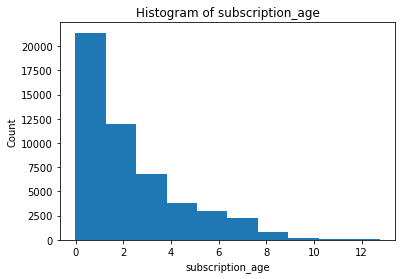

In [9]:
# Plot a histogram of the age variable
plt.hist(data['subscription_age'])
plt.title("Histogram of subscription_age")
plt.xlabel("subscription_age")
plt.ylabel("Count")
plt.show()

<AxesSubplot:title={'center':'Number of customers churn'}, xlabel='churn', ylabel='count'>

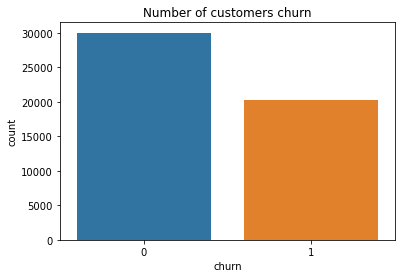

In [10]:
plt.title("Number of customers churn")
sns.countplot(x = 'churn' ,  data = data)

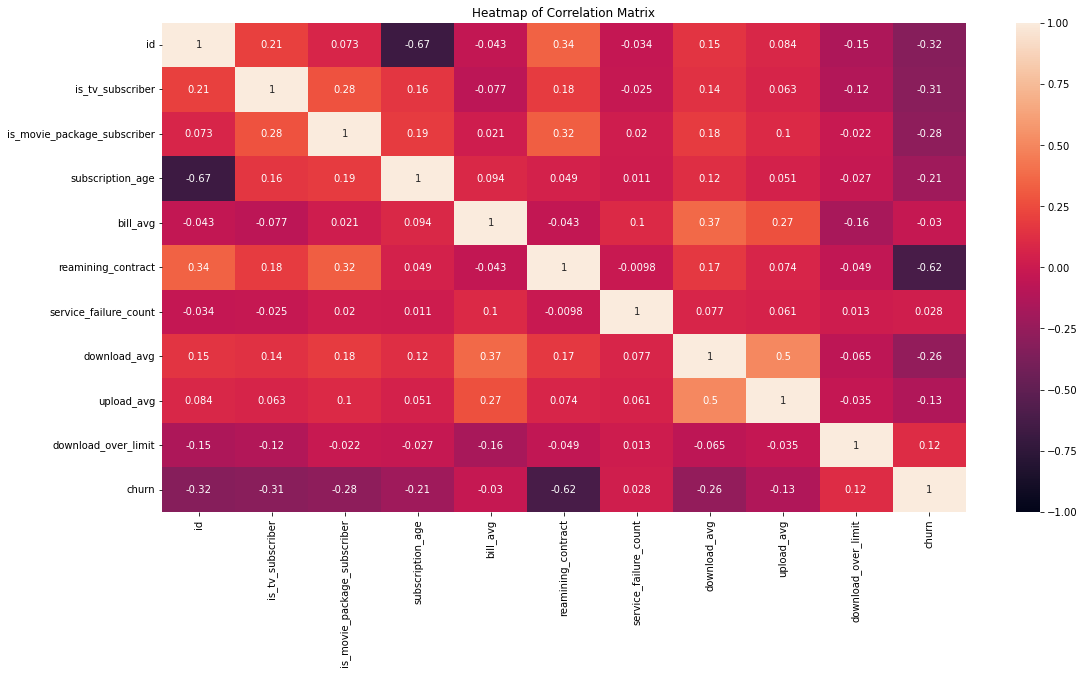

In [11]:
# Plot a heatmap of the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(),xticklabels=corr_matrix.columns,yticklabels=corr_matrix.columns,vmin=-1,vmax=1,annot=True)
plt.title("Heatmap of Correlation Matrix")
plt.show()

## download_over_limit is most corrolated feature and then service_failure_count

In [12]:
def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')
    
    #mean = feature.describe().mean()
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    #plt.legend({'--': mu, 'sigma': sigma})
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()
num_feat = data.select_dtypes(exclude = 'object')

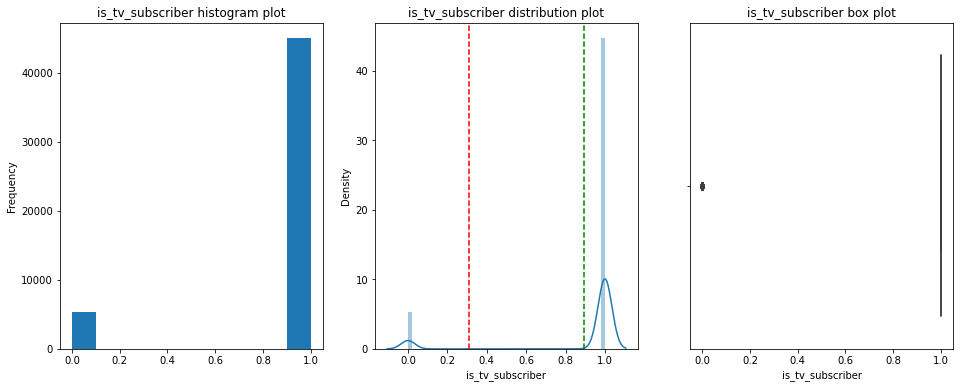

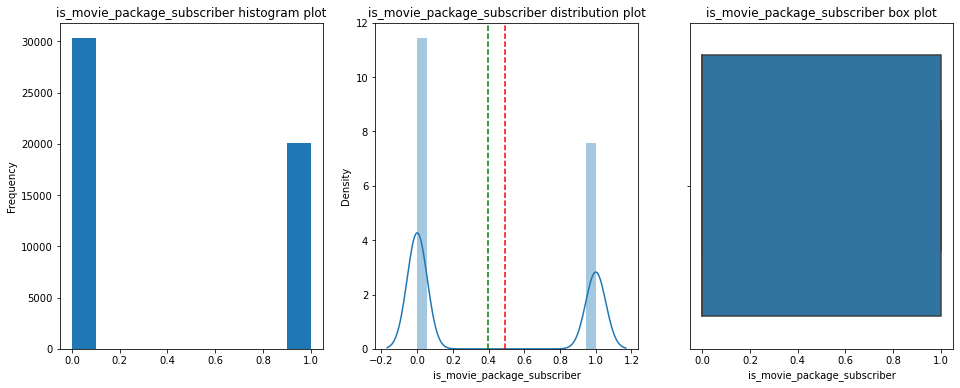

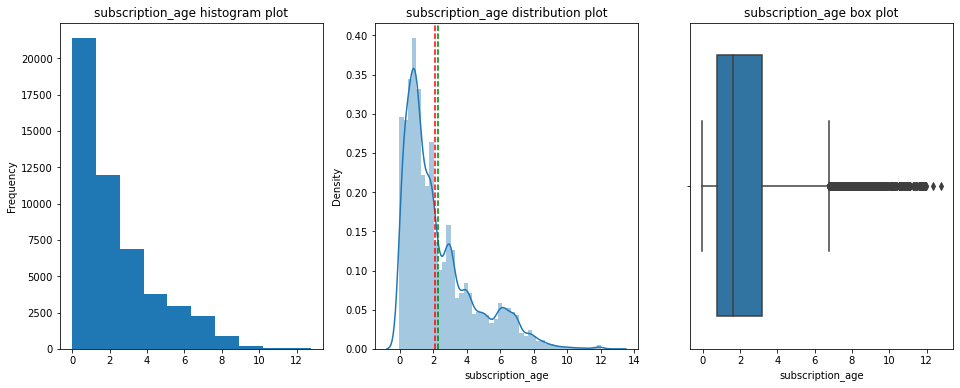

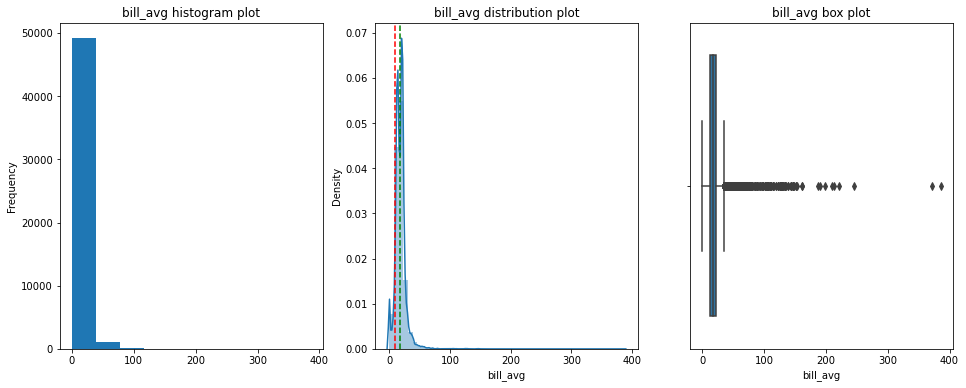

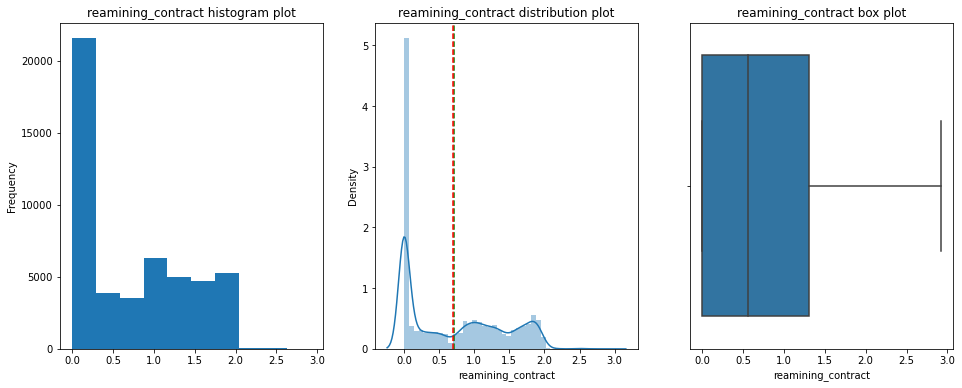

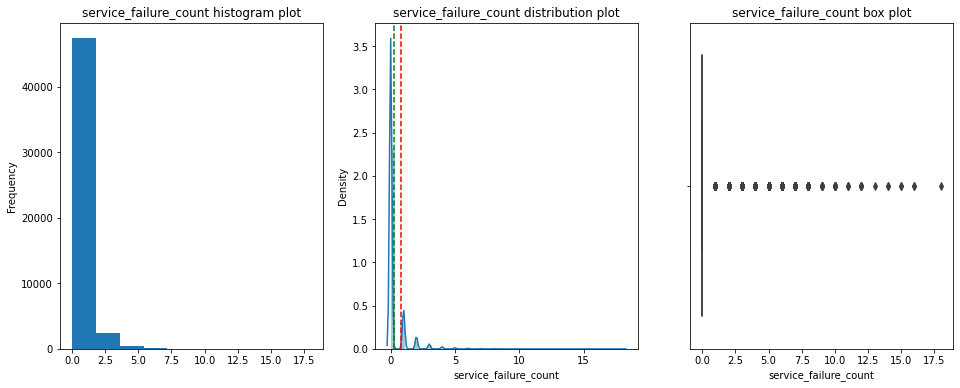

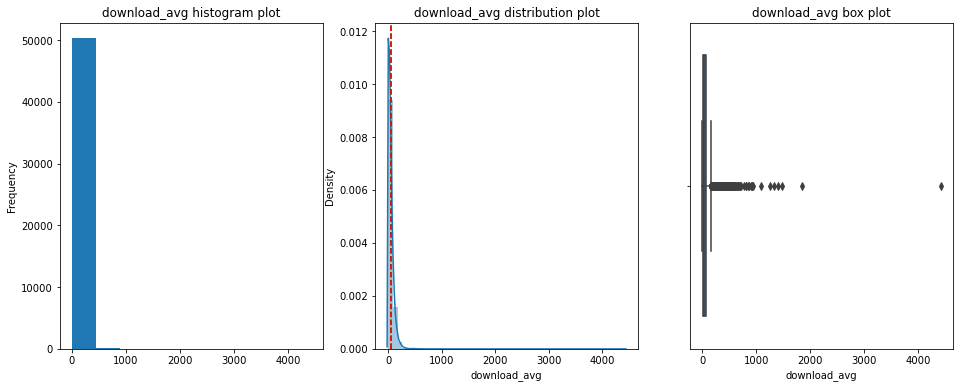

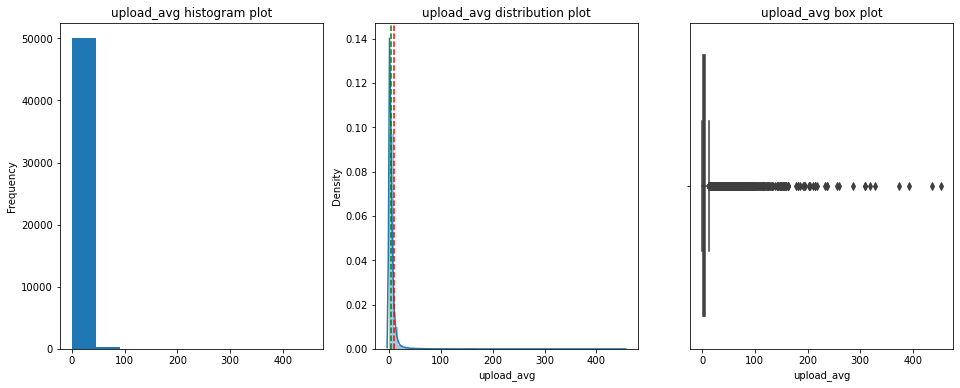

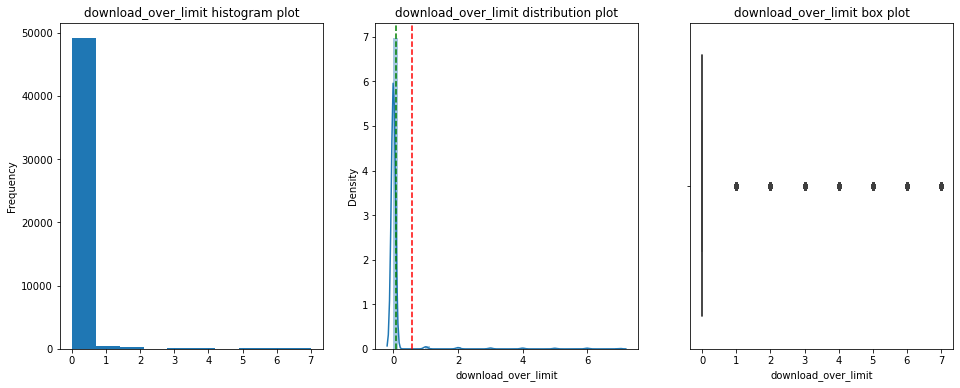

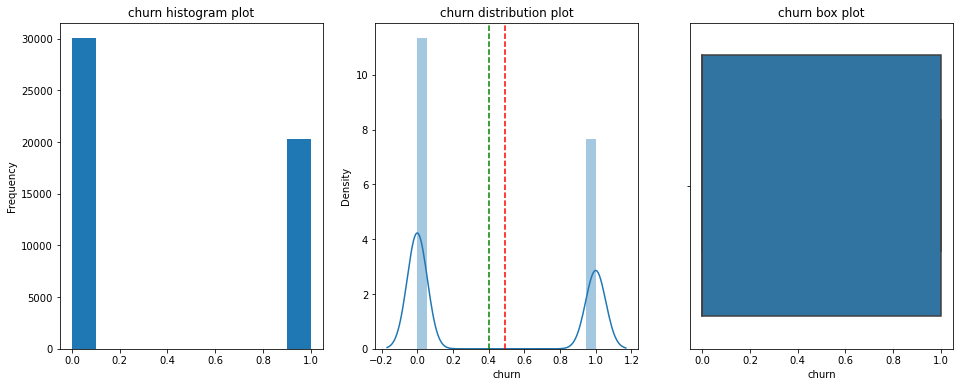

In [13]:
for i in num_feat.columns:
    if i=="id":
        continue
    feat_plot(num_feat[i])

# DATA PREPARATION

In [14]:
data.subscription_age.value_counts()

 1.97    656
 0.01    299
 0.99    285
 0.96    251
 0.64    247
        ... 
 9.71      1
 9.68      1
 9.61      1
 9.58      1
-0.02      1
Name: subscription_age, Length: 1060, dtype: int64

In [15]:
# Drop rows with subscription_age less than 0
data = data.drop(data.loc[data['subscription_age'] < 0].index)
data.shape

(50374, 11)

<AxesSubplot:>

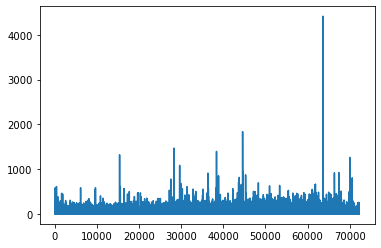

In [16]:
data.download_avg.plot()

In [17]:
# Drop rows with download_avg more than 500 gb
data = data.drop(data.loc[data['download_avg'] > 500].index)
data.shape

(50325, 11)

<AxesSubplot:>

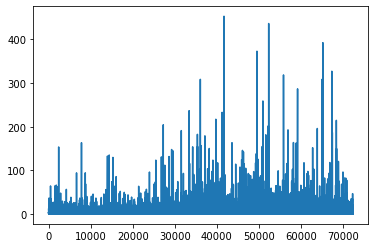

In [18]:
data.upload_avg.plot()

In [19]:
# Drop rows with upload_avg more than 50 gb
data = data.drop(data.loc[data['upload_avg'] > 50].index)
data.shape

(50050, 11)

In [20]:
data.isnull().sum()

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

In [21]:
data.bill_avg.value_counts()

22     4816
21     4013
12     3983
20     3908
14     3502
       ... 
92        1
139       1
146       1
75        1
191       1
Name: bill_avg, Length: 126, dtype: int64

In [22]:
data=data.drop("id",axis=1)
data.dtypes

is_tv_subscriber                 int64
is_movie_package_subscriber      int64
subscription_age               float64
bill_avg                         int64
reamining_contract             float64
service_failure_count            int64
download_avg                   float64
upload_avg                     float64
download_over_limit              int64
churn                            int64
dtype: object

In [23]:
y=data['churn'].values
X=data.drop(["churn"],axis=1)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50050 entries, 0 to 72273
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             50050 non-null  int64  
 1   is_movie_package_subscriber  50050 non-null  int64  
 2   subscription_age             50050 non-null  float64
 3   bill_avg                     50050 non-null  int64  
 4   reamining_contract           50050 non-null  float64
 5   service_failure_count        50050 non-null  int64  
 6   download_avg                 50050 non-null  float64
 7   upload_avg                   50050 non-null  float64
 8   download_over_limit          50050 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 3.8 MB


In [25]:
y

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

# MODELLING

In [26]:
list_internet=[]

# Logistic Regression

In [27]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

In [28]:
pipe = Pipeline([('Classifier', LogisticRegression())])


search_space = [{'Classifier': [LogisticRegression(solver='liblinear')],
                 'Classifier__C': np.logspace(-4, 4, 30),
                 'Classifier__penalty':['l1','l2']}]

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('Classifier',
   LogisticRegression(C=62.10169418915616, penalty='l1', solver='liblinear'))],
 'verbose': False,
 'Classifier': LogisticRegression(C=62.10169418915616, penalty='l1', solver='liblinear'),
 'Classifier__C': 62.10169418915616,
 'Classifier__class_weight': None,
 'Classifier__dual': False,
 'Classifier__fit_intercept': True,
 'Classifier__intercept_scaling': 1,
 'Classifier__l1_ratio': None,
 'Classifier__max_iter': 100,
 'Classifier__multi_class': 'auto',
 'Classifier__n_jobs': None,
 'Classifier__penalty': 'l1',
 'Classifier__random_state': None,
 'Classifier__solver': 'liblinear',
 'Classifier__tol': 0.0001,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [29]:
best_model.best_params_

{'Classifier': LogisticRegression(C=62.10169418915616, penalty='l1', solver='liblinear'),
 'Classifier__C': 62.10169418915616,
 'Classifier__penalty': 'l1'}

In [30]:
model=LogisticRegression(C=62.10169418915616,penalty='l1',solver='liblinear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
dic_log={}
dic_log['name']='Logistic'
dic_log['Accuracy']=accuracy_score(y_test, y_pred)
dic_log['Precision']=precision_score(y_test, y_pred, average='weighted')
dic_log['Re-call']=recall_score(y_test, y_pred, average='weighted')
dic_log['F1-Score']=f1_score(y_test, y_pred, average='weighted')
dic_log['Cohens-Kappa']=cohen_kappa_score(y_test, y_pred)
dic_log['Mape']=mean_absolute_percentage_error(y_test, y_pred)
list_internet.append(dic_log)

Accuracy: 0.8686313686313686


# KNN

In [31]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

In [32]:
pipe = Pipeline([('Classifier', KNeighborsClassifier())])


search_space = [{'Classifier': [KNeighborsClassifier()],
                 'Classifier__n_neighbors':[2,3,4,5,6]}]


clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('Classifier', KNeighborsClassifier())],
 'verbose': False,
 'Classifier': KNeighborsClassifier(),
 'Classifier__algorithm': 'auto',
 'Classifier__leaf_size': 30,
 'Classifier__metric': 'minkowski',
 'Classifier__metric_params': None,
 'Classifier__n_jobs': None,
 'Classifier__n_neighbors': 5,
 'Classifier__p': 2,
 'Classifier__weights': 'uniform'}

In [33]:
best_model.best_params_

{'Classifier': KNeighborsClassifier(), 'Classifier__n_neighbors': 5}

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
dic_knn={}
dic_knn['name']='KNN'
dic_knn['Accuracy']=accuracy_score(y_test, y_pred)
dic_knn['Precision']=precision_score(y_test, y_pred, average='weighted')
dic_knn['Re-call']=recall_score(y_test, y_pred, average='weighted')
dic_knn['F1-Score']=f1_score(y_test, y_pred, average='weighted')
dic_knn['Cohens-Kappa']=cohen_kappa_score(y_test, y_pred)
dic_knn['Mape']=mean_absolute_percentage_error(y_test, y_pred)
list_internet.append(dic_knn)

Accuracy: 0.82007992007992


# Random Forest Classifier

In [35]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

In [36]:
pipe = Pipeline([('Classifier', RandomForestClassifier())])


search_space = [{'Classifier': [RandomForestClassifier(random_state=63)],
                 'Classifier__n_estimators': [100, 200,300,400,500,600],
                 'Classifier__max_features': [3,4,5,6,7]}]


clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('Classifier',
   RandomForestClassifier(max_features=7, n_estimators=600, random_state=63))],
 'verbose': False,
 'Classifier': RandomForestClassifier(max_features=7, n_estimators=600, random_state=63),
 'Classifier__bootstrap': True,
 'Classifier__ccp_alpha': 0.0,
 'Classifier__class_weight': None,
 'Classifier__criterion': 'gini',
 'Classifier__max_depth': None,
 'Classifier__max_features': 7,
 'Classifier__max_leaf_nodes': None,
 'Classifier__max_samples': None,
 'Classifier__min_impurity_decrease': 0.0,
 'Classifier__min_impurity_split': None,
 'Classifier__min_samples_leaf': 1,
 'Classifier__min_samples_split': 2,
 'Classifier__min_weight_fraction_leaf': 0.0,
 'Classifier__n_estimators': 600,
 'Classifier__n_jobs': None,
 'Classifier__oob_score': False,
 'Classifier__random_state': 63,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [37]:
best_model.best_params_

{'Classifier': RandomForestClassifier(max_features=7, n_estimators=600, random_state=63),
 'Classifier__max_features': 7,
 'Classifier__n_estimators': 600}

In [38]:
clf=RandomForestClassifier(random_state=63,n_estimators=600,max_features=7)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
dic_rnd={}
dic_rnd['name']='Random Forest'
dic_rnd['Accuracy']=accuracy_score(y_test, y_pred)
dic_rnd['Precision']=precision_score(y_test, y_pred, average='weighted')
dic_rnd['Re-call']=recall_score(y_test, y_pred, average='weighted')
dic_rnd['F1-Score']=f1_score(y_test, y_pred, average='weighted')
dic_rnd['Cohens-Kappa']=cohen_kappa_score(y_test, y_pred)
dic_rnd['Mape']=mean_absolute_percentage_error(y_test, y_pred)
list_internet.append(dic_rnd)

Accuracy: 0.9521478521478521


# Decision Tree Classifier

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=63)

In [40]:
pipe = Pipeline([('Classifier', DecisionTreeClassifier())])


search_space = {
    'Classifier__max_depth': [3, 5, 7],
    'Classifier__min_samples_split': [2, 4, 6],
    'Classifier__min_samples_leaf': [1, 2, 3]
}

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('Classifier',
   DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=6))],
 'verbose': False,
 'Classifier': DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=6),
 'Classifier__ccp_alpha': 0.0,
 'Classifier__class_weight': None,
 'Classifier__criterion': 'gini',
 'Classifier__max_depth': 7,
 'Classifier__max_features': None,
 'Classifier__max_leaf_nodes': None,
 'Classifier__min_impurity_decrease': 0.0,
 'Classifier__min_impurity_split': None,
 'Classifier__min_samples_leaf': 3,
 'Classifier__min_samples_split': 6,
 'Classifier__min_weight_fraction_leaf': 0.0,
 'Classifier__random_state': None,
 'Classifier__splitter': 'best'}

In [41]:
clf = DecisionTreeClassifier(max_depth=7, min_samples_split=6, min_samples_leaf=3)
clf.fit(X_train,y_train)
predictions = model.predict(X_test)
clf.score(X_test,y_test)
dic_dct={}
dic_dct['name']='Decision Tree'
dic_dct['Accuracy']=accuracy_score(y_test, y_pred)
dic_dct['Precision']=precision_score(y_test, y_pred, average='weighted')
dic_dct['Re-call']=recall_score(y_test, y_pred, average='weighted')
dic_dct['F1-Score']=f1_score(y_test, y_pred, average='weighted')
dic_dct['Cohens-Kappa']=cohen_kappa_score(y_test, y_pred)
dic_dct['Mape']=mean_absolute_percentage_error(y_test, y_pred)
list_internet.append(dic_dct)

# Naive Bayes Classifier

In [42]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)
pipe=Pipeline([('classifier', GaussianNB())])
search_space = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
}
grid = GridSearchCV(pipe,search_space,refit=True,verbose=2,scoring='accuracy',cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ....................classifier__var_smoothing=1e-09; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-09; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-09; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-09; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-09; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-08; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-08; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-08; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-08; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-08; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-07; total time=   0.0s
[CV] END ....................classifier__var_smoo

GridSearchCV(cv=5, estimator=Pipeline(steps=[('classifier', GaussianNB())]),
             param_grid={'classifier__var_smoothing': [1e-09, 1e-08, 1e-07,
                                                       1e-06, 1e-05, 0.0001,
                                                       0.001, 0.01]},
             scoring='accuracy', verbose=2)

In [43]:
grid.best_params_

{'classifier__var_smoothing': 0.0001}

In [44]:
clf=GaussianNB(var_smoothing= 0.0001)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
dic_nbc={}
dic_nbc['name']='Naive Bayes'
dic_nbc['Accuracy']=accuracy_score(y_test, y_pred)
dic_nbc['Precision']=precision_score(y_test, y_pred, average='weighted')
dic_nbc['Re-call']=recall_score(y_test, y_pred, average='weighted')
dic_nbc['F1-Score']=f1_score(y_test, y_pred, average='weighted')
dic_nbc['Cohens-Kappa']=cohen_kappa_score(y_test, y_pred)
dic_nbc['Mape']=mean_absolute_percentage_error(y_test, y_pred)
list_internet.append(dic_nbc)

Accuracy: 0.8278721278721278


# EVALUATION

In [45]:
results=pd.DataFrame(list_internet)
results

,name,Accuracy,Precision,Re-call,F1-Score,Cohens-Kappa,Mape
0,Logistic,0.868631,0.868545,0.868631,0.868585,0.726531,2.919916e+14
1,KNN,0.820080,0.821888,0.820080,0.816304,0.614309,2.420516e+14
2,Random Forest,0.952148,0.953274,0.952148,0.951807,0.899226,4.049190e+13
3,Decision Tree,0.952148,0.953274,0.952148,0.951807,0.899226,4.049190e+13
4,Naive Bayes,0.827872,0.828401,0.827872,0.825166,0.633265,2.573486e+14
